#**NEBULA SPACE ORGANISATION - CAB CASE STUDY**
###***BY DIVYARANJAN SAHOO***
<hr>

###**Problem Description**

XYZ, a private equity firm in the US, is eyeing the growing Cab Industry for potential investment. With the sector experiencing significant growth and having several key players, XYZ sees an opportunity to invest in this thriving market.
<br><br>
###**Data Description**
Data provided here is semi-structured. File format: CSV (comma-separated values)
CSV Files
Provided:

1. Cab_Data.csv -
Contents: Transaction details for two cab companies, including:
Transaction ID, Date of Travel, Company, City, KM Travelled, Price Charged and Cost of Trip in the time period: January 31, 2018, to December 31, 2020



2. Customer_ID.csv - Contents: Customer demographic details, including:
Customer ID, Gender, Age, Income (USD/Month)

3. Transaction_ID.csv - Contents: Mapping table linking transaction IDs to customer IDs and payment modes:
Transaction ID, Customer ID, Payment_Mode

4. City.csv - Contents: Information about US cities, including:
City, Population, Users

<br>
Additional Information: -

Data quality: The data has been reviewed for completeness and consistency, but there are possibilities of potential errors or anomalies, which has to be checked once before analysis.

Missing values: Some fields may contain missing values, which will be addressed during data cleaning.<br><br>

###**Investigation Algorithm**

* Review the Source Documentation
* Understand the field names and data types
* Identify relationships across the files
* Field/feature transformations
* Determine which files should be joined versus which ones should be appended
* Aggregate the data into smaller files and define relationships
* Identify and remove duplicates
* Identify any biasness existing in the data item




In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

####**Loading the files**
CSV files are loaded using pandas module into data frames


In [30]:
cab_data = pd.read_csv("Cab_Data.csv")
customer_id = pd.read_csv("Customer_ID.csv")
transaction_id = pd.read_csv("Transaction_ID.csv")
city_data = pd.read_csv("City.csv")

Head command to show first 5 values of the table including column attribute


In [31]:
cab_data.head()
customer_id.head()
transaction_id.head()
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


####**Handling missing values**

Missing data can throw a wrench in our analysis, but fear not! Here is how pandas can be used to handle missing values in the dataset.





In [32]:
#Find missing data
cab_data.isnull().sum()
customer_id.isnull().sum()
transaction_id.isnull().sum()
city_data.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

####**Imputation: Fill in the blanks with smart estimates.**

Mean method: Missing values are replaced with the average value for that column to handle null value issue.

In [33]:
#Imputation: Fill empty data with mean
cab_data.fillna(cab_data.mean())
customer_id.fillna(cab_data.mean())
transaction_id.fillna(cab_data.mean())
city_data.fillna(cab_data.mean())

<ipython-input-33-0b884db70054>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cab_data.fillna(cab_data.mean())
<ipython-input-33-0b884db70054>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  customer_id.fillna(cab_data.mean())
<ipython-input-33-0b884db70054>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this war

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [34]:
cab_data["Date of Travel"] = pd.to_datetime(cab_data["Date of Travel"])

<ipython-input-34-fbf9121e506d>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cab_data["Date of Travel"] = pd.to_datetime(cab_data["Date of Travel"])


In [35]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Unnamed: 7
0,10000011,2018-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,NaN
1,10000012,2018-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,NaN
2,10000013,2018-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,NaN
3,10000014,2018-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,NaN
4,10000015,2018-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,NaN


In [36]:
# Merged cab_data and customer_id dataframe
merged_data = transaction_id.merge(cab_data, on="Transaction ID").merge(customer_id, on="Customer ID").merge(city_data, on ="City")

In [37]:
#Data description
merged_data.describe()

,Transaction ID,Customer ID,KM Travelled,Price Charged,Cost of Trip,Unnamed: 7,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,0.0,359392.000000,359392.000000
mean,1.022076e+07,19191.652115,22.567254,423.443311,286.190113,NaN,35.336705,15048.822937
std,1.268058e+05,21012.412463,12.233526,274.378911,157.993661,NaN,12.594234,7969.409482
min,1.000001e+07,1.000000,1.900000,15.600000,19.000000,NaN,18.000000,2000.000000
25%,1.011081e+07,2705.000000,12.000000,206.437500,151.200000,NaN,25.000000,8424.000000
50%,1.022104e+07,7459.000000,22.440000,386.360000,282.480000,NaN,33.000000,14685.000000
75%,1.033094e+07,36078.000000,32.960000,583.660000,413.683200,NaN,42.000000,21035.000000
max,1.044011e+07,60000.000000,48.000000,2048.030000,691.200000,NaN,65.000000,35000.000000


In [38]:
merged_data.isnull().sum()
merged_data.fillna(cab_data.mean())

<ipython-input-38-046ac2ccb944>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  merged_data.fillna(cab_data.mean())
<ipython-input-38-046ac2ccb944>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_data.fillna(cab_data.mean())


,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Unnamed: 7,Gender,Age,Income (USD/Month),Population,Users
0,10000011,29290,Card,2018-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,NaN,Male,28,10813,"814,885","24,701"
1,10351127,29290,Cash,2020-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,NaN,Male,28,10813,"814,885","24,701"
2,10412921,29290,Card,2020-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,NaN,Male,28,10813,"814,885","24,701"
3,10000012,27703,Card,2018-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,NaN,Male,27,9237,"814,885","24,701"
4,10320494,27703,Card,2020-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,NaN,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,51406,Cash,2020-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,NaN,Female,29,6829,"418,859","127,001"
359388,10319775,51406,Cash,2020-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,NaN,Female,29,6829,"418,859","127,001"
359389,10347676,51406,Card,2020-06-07,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,NaN,Female,29,6829,"418,859","127,001"
359390,10358624,51406,Cash,2020-02-08,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,NaN,Female,29,6829,"418,859","127,001"


##**FROM DATA TO DECISIONS: KEY INSIGHTS AND ANALYTICS**

Here I have presented the data driven analytics using statistical methods, tabular data and graph plotting, the following points were taken care here:

*   Highlighting the specific statistical methods used and how they were applied to the data.
*   Summarizing the key insights and findings uncovered from the analysis.
*   Conveying the significance and impact of my findings in the context of the analysis done here, leading to the final decisions.



In [39]:
# Dataframe information
merged_data.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  object        
 3   Date of Travel      359392 non-null  datetime64[ns]
 4   Company             359392 non-null  object        
 5   City                359392 non-null  object        
 6   KM Travelled        359392 non-null  float64       
 7   Price Charged       359392 non-null  float64       
 8   Cost of Trip        359392 non-null  float64       
 9   Unnamed: 7          0 non-null       float64       
 10  Gender              359392 non-null  object        
 11  Age                 359392 non-null  int64         
 12  Income (USD/Month)  359392 non-null  int64         
 13  Population          359392 no

In [40]:
#Check Duplicate rows
duplicate = merged_data[merged_data.duplicated()]
duplicate

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Unnamed: 7,Gender,Age,Income (USD/Month),Population,Users


<hr>

####**Hypothesis testing**

Hypothesis testing is a statistical method used to make inferences about a population based on sample data. Here I have done hypothesis testing by:

1. Formulating a hypothesis: Based on certain decision points, researech questions are formulated
2. Connecting it to data analysis: Comparing fares, transaction volumes, customer profiles, and time series data.
3. Emphasizing the value of data-driven insights: Finding the investment sweet spot and uncovering broader truths.

Here, we'll procceed with our investigation on certain assumptions and get analysis results to encourage/foster our decision to invest.
<br><hr>
#####Hypothesis testing 1 - Los angeles is the city with maximum number of running cabs

In [41]:
#Hypothesis testing 1 -Los angeles is the city with maximum number of running cabs
hypothesis1 = merged_data['City'].value_counts()
hypothesis1

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

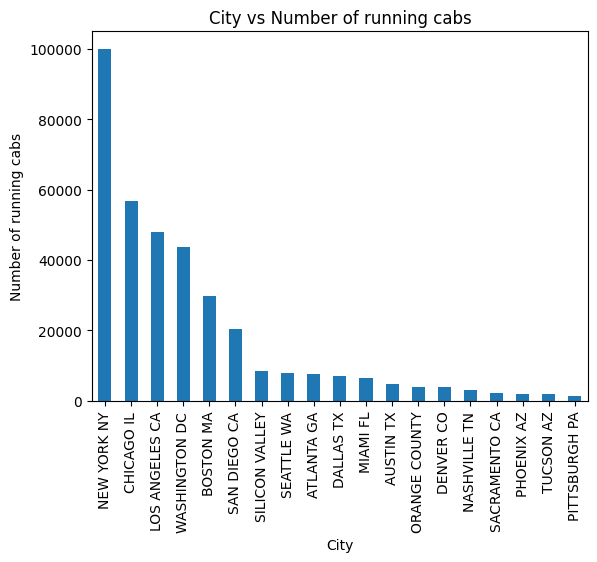

In [42]:
hypothesis1.plot(kind='bar', title='Payment mode dependence')
plt.title('City vs Number of running cabs')
plt.xlabel('City')
plt.ylabel('Number of running cabs')
plt.show()

Inference ~ New York and Chicago city has the maximum number of running cabs, it contradicts the hypotesis, i.e Los angeles is the city with maximum number of running cabs <hr>

#####Hypothesis testing 2 - There's no gender based preferences for chosing cab

In [43]:
#Hypothesis testing 2 - There's no gender based preferences for chosing cab
hypothesis2 = pd.crosstab(merged_data['Gender'], merged_data['Company'])
hypothesis2


Company,Pink Cab,Yellow Cab
Gender,,
Female,37480,116000
Male,47231,158681


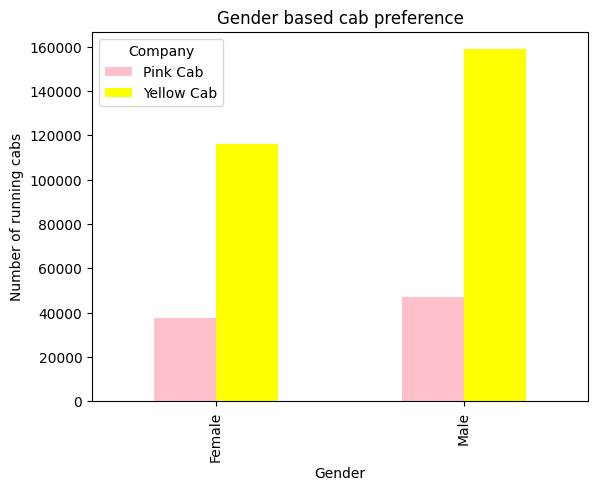

In [44]:
div_colors = ['pink','yellow']
hypothesis2.plot(kind='bar', title='Gender preference', color=div_colors)
plt.title('Gender based cab preference')
plt.xlabel('Gender')
plt.ylabel('Number of running cabs')
plt.show()

#####Inference - The analysis output shows that male are more consumers of cab in US than female, overally yellow cab are more prefered <br><hr>

####Hypothesis Testing 3 - People prefer yellow cabs more in winter (November (11) to January (1))

In [45]:
# Hypothesis testing 3 - People prefer yellow cabs more in winter (November (11) to January (1))
winter_months = [11,12,1]
other_months = [2,3,4,5,6,7,8,9,10]
nonwinter_trips = merged_data[((merged_data["Company"] == "Pink Cab") | (merged_data["Company"] == "Yellow Cab")) & (merged_data["Date of Travel"].dt.month.isin(other_months))]
winter_trips = merged_data[((merged_data["Company"] == "Pink Cab") | (merged_data["Company"] == "Yellow Cab")) & (merged_data["Date of Travel"].dt.month.isin(winter_months))]
hypothesis3 = winter_trips.groupby("Company")["Transaction ID"].count()
hypothesis3

Company
Pink Cab      23492
Yellow Cab    74822
Name: Transaction ID, dtype: int64

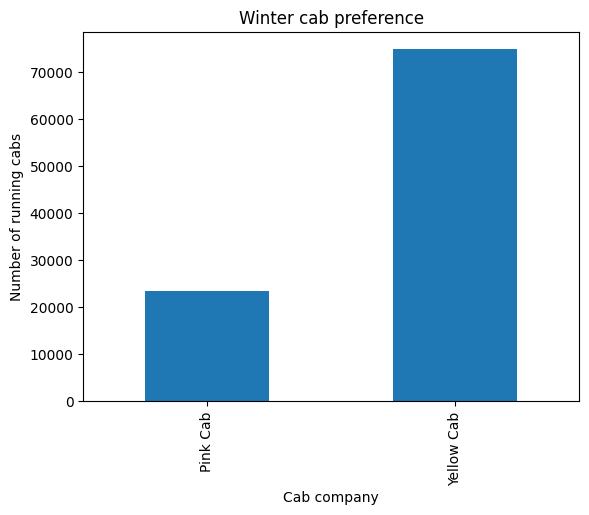

In [46]:
hypothesis3.plot(kind='bar', title='Winter Preference')
plt.title('Winter cab preference')
plt.xlabel('Cab company')
plt.ylabel('Number of running cabs')
plt.show()

In [47]:
#Hypothesis Testing 4 - Payment mode is dependent variable for clients
hypothesis4 = pd.crosstab(merged_data['Payment_Mode'], merged_data['Company'])
hypothesis4


Company,Pink Cab,Yellow Cab
Payment_Mode,,
Card,50719,164785
Cash,33992,109896


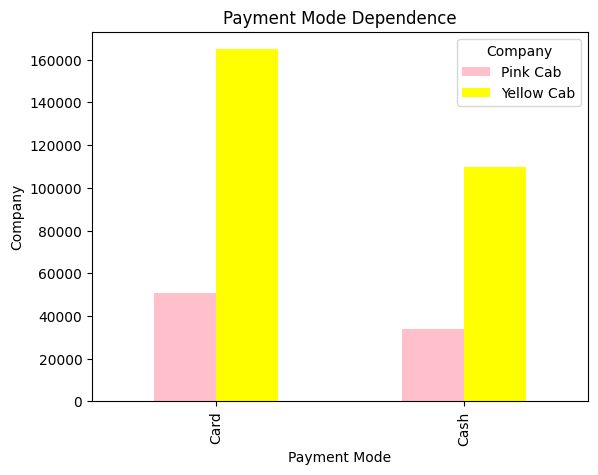

In [48]:
#Plot, with color assigned to company
#div_colors = ['pink' if company == 'Pink Cab' else 'yellow' for company in merged_data['Company']]
div_colors = ['pink','yellow']
hypothesis4.plot(kind='bar', title='Payment Mode Dependence', color=div_colors)
plt.xlabel('Payment Mode')
plt.ylabel('Company')
plt.show()

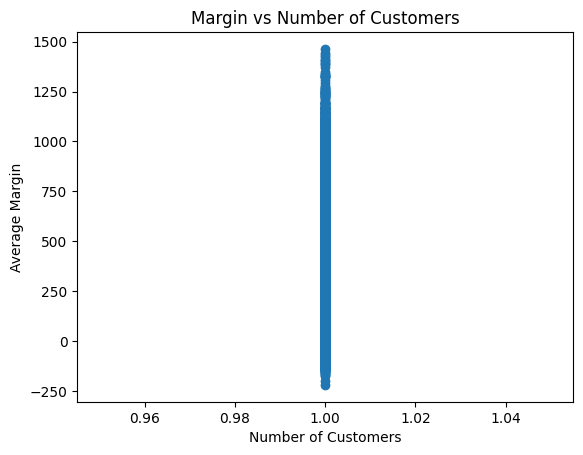

In [49]:
#Hypothesis Testing 5 - Margin proportionally increase with increase in number of customers

merged_data['Margin'] = merged_data['Price Charged'] - merged_data['Cost of Trip']

# Visualize the relationship between Number of Customers and Margin
plt.scatter(merged_data.groupby('Transaction ID').size(), merged_data.groupby('Transaction ID')['Margin'].mean())
plt.title('Margin vs Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Average Margin')
plt.show()

In [50]:
customer_segments = merged_data.groupby('Customer ID').agg({ 'Gender': 'first', 'Age': 'mean','Income (USD/Month)': 'mean','Transaction ID': 'count'}).rename(columns={'Transaction ID': 'Number of Transactions'})
customer_segments.describe()

,Age,Income (USD/Month),Number of Transactions
count,46148.000000,46148.000000,46148.000000
mean,35.358499,14997.863764,7.787813
std,12.605460,7999.204793,9.208328
min,18.000000,2000.000000,1.000000
25%,25.000000,8289.750000,2.000000
50%,33.000000,14625.500000,3.000000
75%,42.000000,21022.000000,12.000000
max,65.000000,35000.000000,54.000000


<hr>


####**Hypothesis Testing 6 - Young customers (Age 18 to 24) prefer yellow cabs more**

In [51]:
#Hypothesis testing 6 - Young customers (Age 18 to 24 )prefer yellow cabs more
young_people_data = merged_data[(merged_data['Age'] >= 18) & (merged_data['Age'] <= 24)]
hypothesis6 = young_people_data.groupby('Company').size()
hypothesis6

Company
Pink Cab      19306
Yellow Cab    62065
dtype: int64

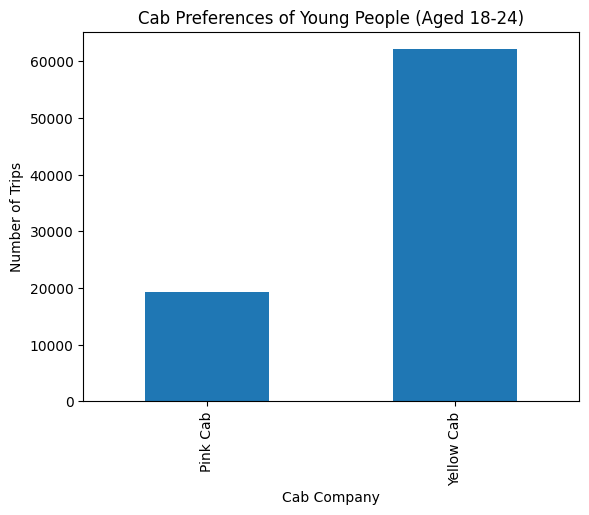

In [52]:
hypothesis6.plot(kind='bar', title='Cab Preferences of Young People (Aged 18-24)')
plt.xlabel('Cab Company')
plt.ylabel('Number of Trips')
plt.show()

Inference - Hypothesis true
<br><hr>

In [53]:
#Hypothesis 7 - There's no variance of cab preference between cities
# Contingency Table
hypothesis7 = pd.crosstab(merged_data['City'], merged_data['Company'])
hypothesis7

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,1762,5795
AUSTIN TX,1868,3028
BOSTON MA,5186,24506
CHICAGO IL,9361,47264
DALLAS TX,1380,5637
DENVER CO,1394,2431
LOS ANGELES CA,19865,28168
MIAMI FL,2002,4452
NASHVILLE TN,1841,1169


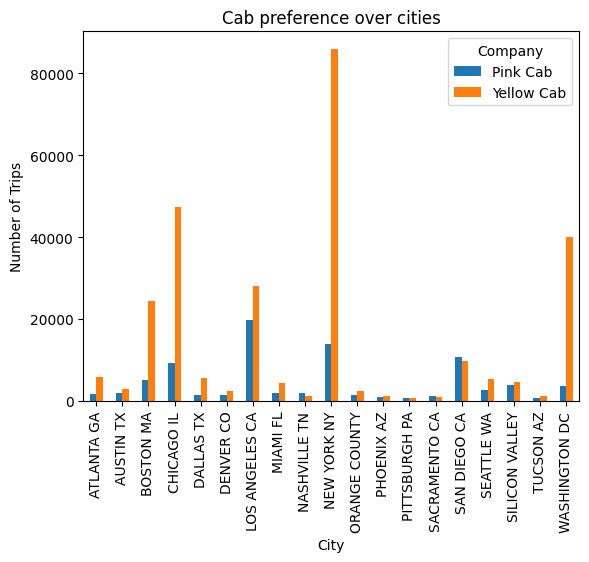

In [54]:
hypothesis7.plot(kind='bar', title='Cab preference over cities')
plt.xlabel('City')
plt.ylabel('Number of Trips')
plt.show()

In [55]:
df = merged_data.groupby("Company")["Transaction ID"].count()
df

Company
Pink Cab       84711
Yellow Cab    274681
Name: Transaction ID, dtype: int64

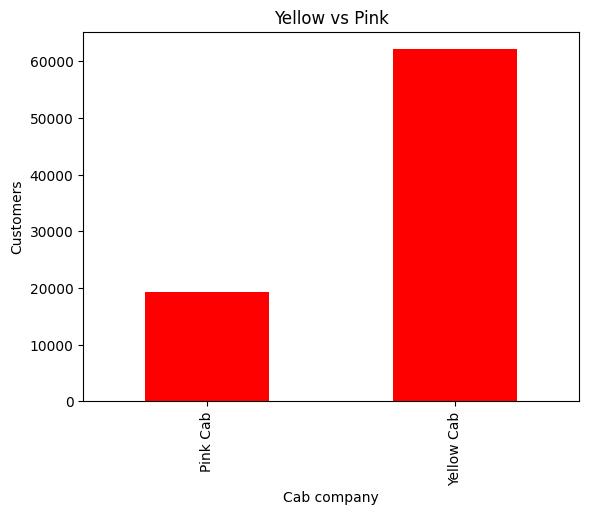

In [56]:
hypothesis6.plot(kind='bar', title='Yellow vs Pink',color='red')
plt.xlabel('Cab company')
plt.ylabel('Customers')
plt.show()